# Regularized Linear Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')

## Ridge Regression

a.k.a _Thikonov Regularization_

$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^n \theta_i^2$

Let $w=\begin{bmatrix} \theta_1 \\ \dots \\ \theta_n \end{bmatrix} $, then $\alpha\frac{1}{2}\sum_{i=1}^n \theta_i^2 = \frac{1}{2}(\| w\|_2)^2$, where $\|w\|_2$ is the $\ell_2$ norm of the weight vector

_huh?_ here's the expansion:

$$
\begin{equation}
\begin{align*}
\|w\|_2 &= (|\theta_1|^2+|\theta_2|^2+\dots+|\theta_n|^2)^\frac{1}{2} \\
(\|w\|_2)^2 &= ((|\theta_1|^2+|\theta_2|^2+\dots+|\theta_n|^2)^\frac{1}{2})^2 \\
&=|\theta_1|^2+|\theta_2|^2+\dots+|\theta_n|^2\\
&=\sum_{i=1}^{n}\theta_i^2\\
\frac{1}{2}(\| w\|_2)^2 &= \frac{1}{2}\sum_{i=1}^n \theta_i^2
\end{align*}
\end{equation}
$$

This is a regular normal equation

$\theta=(X^TX)^{-1}X^Ty$

With regularization,

$\hat{\theta} = (X^T X + \alpha A)^{-1}X^Ty$, where $A$ is the $(n+1)\times(n+1)$ identity matrix.

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

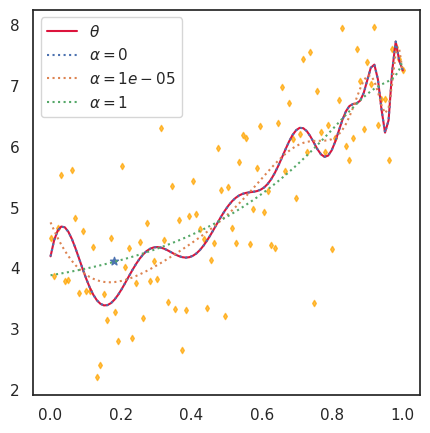

In [93]:
np.random.seed(42)

# let's work with this system
m, n = 100, 1
X = np.linspace(0, 1, 100).reshape(-1, 1)
X_b = np.c_[
    np.zeros(m).reshape(-1), X
]
y = 3 * X**2 + .5 * X + 4 + np.random.randn(m, 1)

degree = 100
pf = PolynomialFeatures(degree = degree)
X_poly = pf.fit_transform(X)

# normal equation
theta_best = np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T @ y

# plot original
_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, y, marker="d", s=10, color='orange', alpha=0.7)
ax.plot(X, X_poly @ theta_best, color="crimson", label=f"$\\theta$")

# ridge regression
for alpha in [0, 1e-5, 1]:
    A = np.identity(degree+1)
    A[0][0] = 0
    reg_term = (alpha * A)
    theta_ridge = np.linalg.pinv(X_poly.T @ X_poly + reg_term) @ X_poly.T @ y
    ax.plot(X, X_poly @ theta_ridge, linestyle=":", label=f"$\\alpha={alpha}$")

# using sklearn
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
x_test = [[0.18]]
y_pred = ridge_reg.predict(x_test)
ax.scatter(x_test, y_pred, marker="*")

plt.legend()
plt.show()

## Lasso Regression

_"Least Absolute Shrinkage and Selection Operator Regression"_